0.7853981633974483


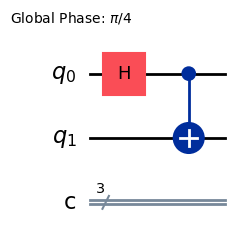

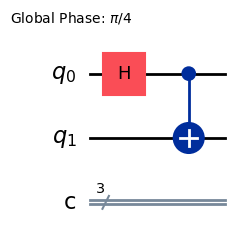

In [12]:
import numpy as np
from qiskit import QuantumCircuit
%matplotlib inline


qc = QuantumCircuit(2, 3)
qc.h(0)
qc.cx(0, 1)
qc.global_phase = np.pi / 4
print(qc.global_phase)

qc.draw('mpl')

DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.


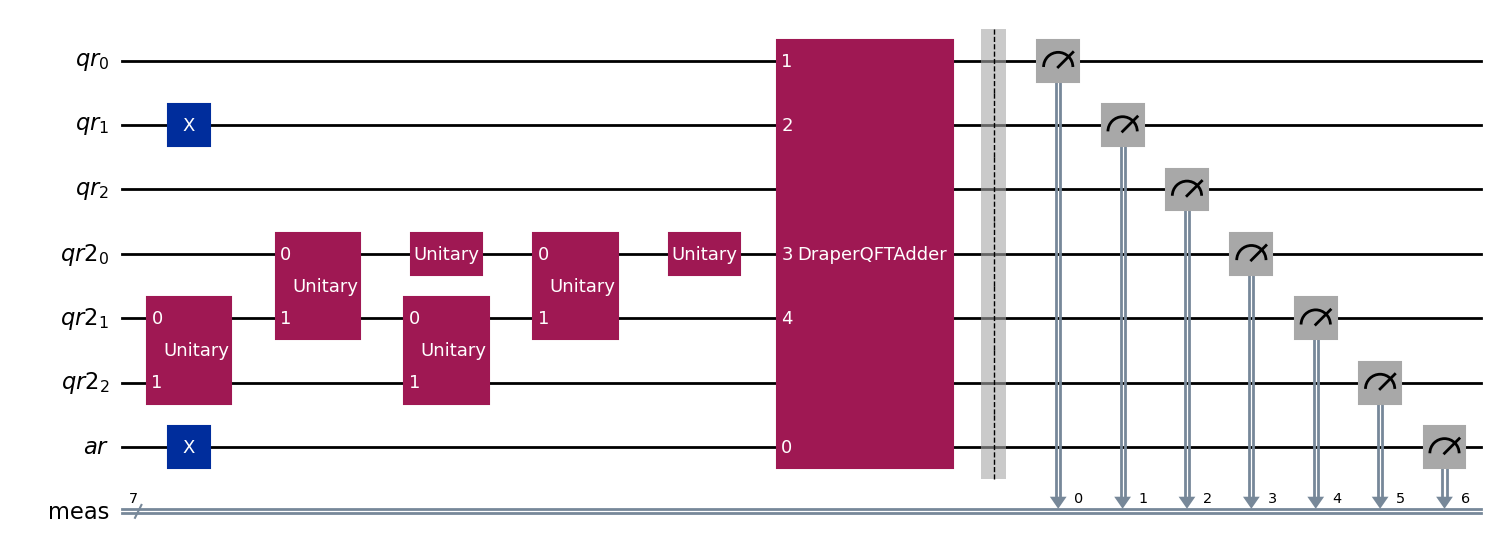

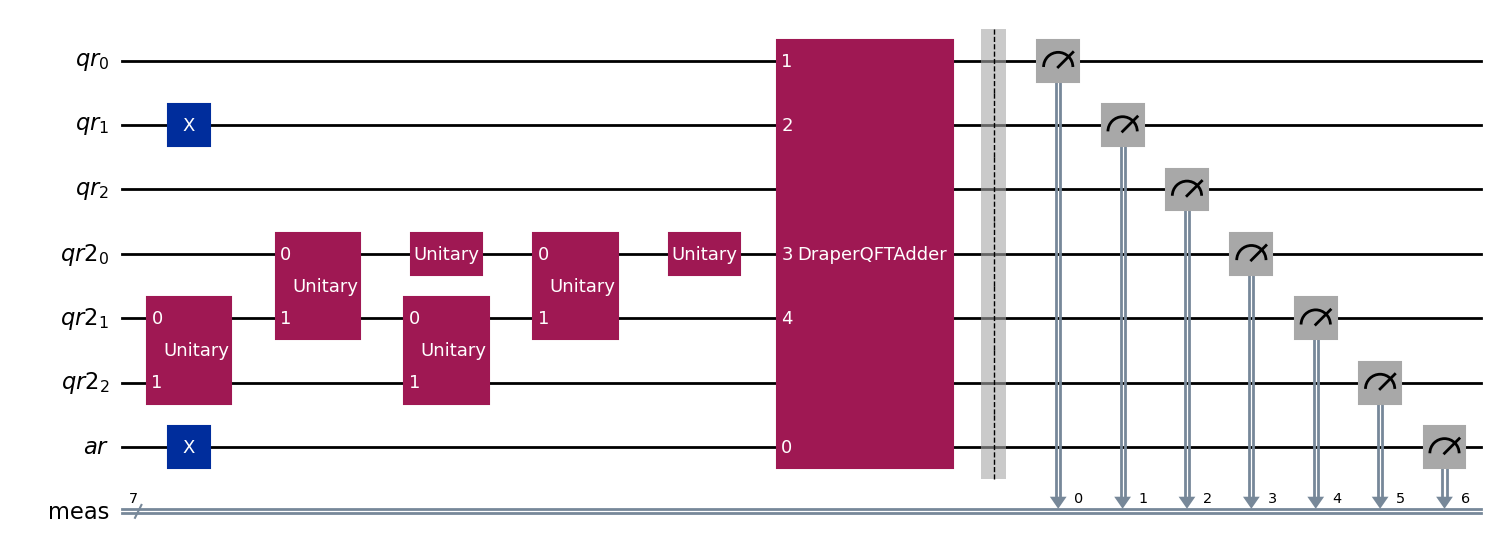

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister
from qiskit.circuit.library import DraperQFTAdder
import numpy as np
from qiskit_mps_initializer.datatypes import QuantumState

qr = QuantumRegister(3, 'qr')
qr2 = QuantumRegister(3, 'qr2')

ar = AncillaRegister(1, 'ar')       
qc = QuantumCircuit(qr, qr2, ar)


psi = [1, 2, 3, 6, 7, 8, 9, 10]
state = QuantumState.from_dense_data(data=psi, normalize=True)
number_of_mps_layers = 2
circuit = state.generate_mps_initializer_circuit(number_of_layers= number_of_mps_layers)
qc.compose(circuit, qubits= qr2, inplace=True)



qc.x(ar[0])
qc.x(qr[1])  


adder = DraperQFTAdder(num_state_qubits=2, kind='half')



qc.append(adder, ar[:] + qr[:2] + qr2[:2])   #problem > i am trying to pass 3 qubits from psi  to quantumregister 1 and 2  that holds 2 qubits each so total 2+2+1   but why we nned to have 3 qubit in register 1 why



qc.measure_all()

qc.draw('mpl')


DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.


/tmp/ipykernel_1323/171640233.py:28: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):


|000>: (0.7291472748150601+0j)
|001>: (0.44233698740134697+0j)
|010>: (-0.08947730244718945+0j)
|011>: (0.18415959168795396+0j)
|100>: (-0.09298503396398233+0j)
|101>: (-0.12962377048275275+0j)
|110>: (-0.43784583094023666+0j)
|111>: (-0.11663527877695298+0j)
Counts: {np.str_('000'): np.float64(0.531655748370229), np.str_('001'): np.float64(0.195662010423299), np.str_('010'): np.float64(0.008006187653226), np.str_('011'): np.float64(0.033914755210674), np.str_('100'): np.float64(0.008646216541283), np.str_('101'): np.float64(0.016802321874165), np.str_('110'): np.float64(0.191708971671746), np.str_('111'): np.float64(0.013603788255378)}


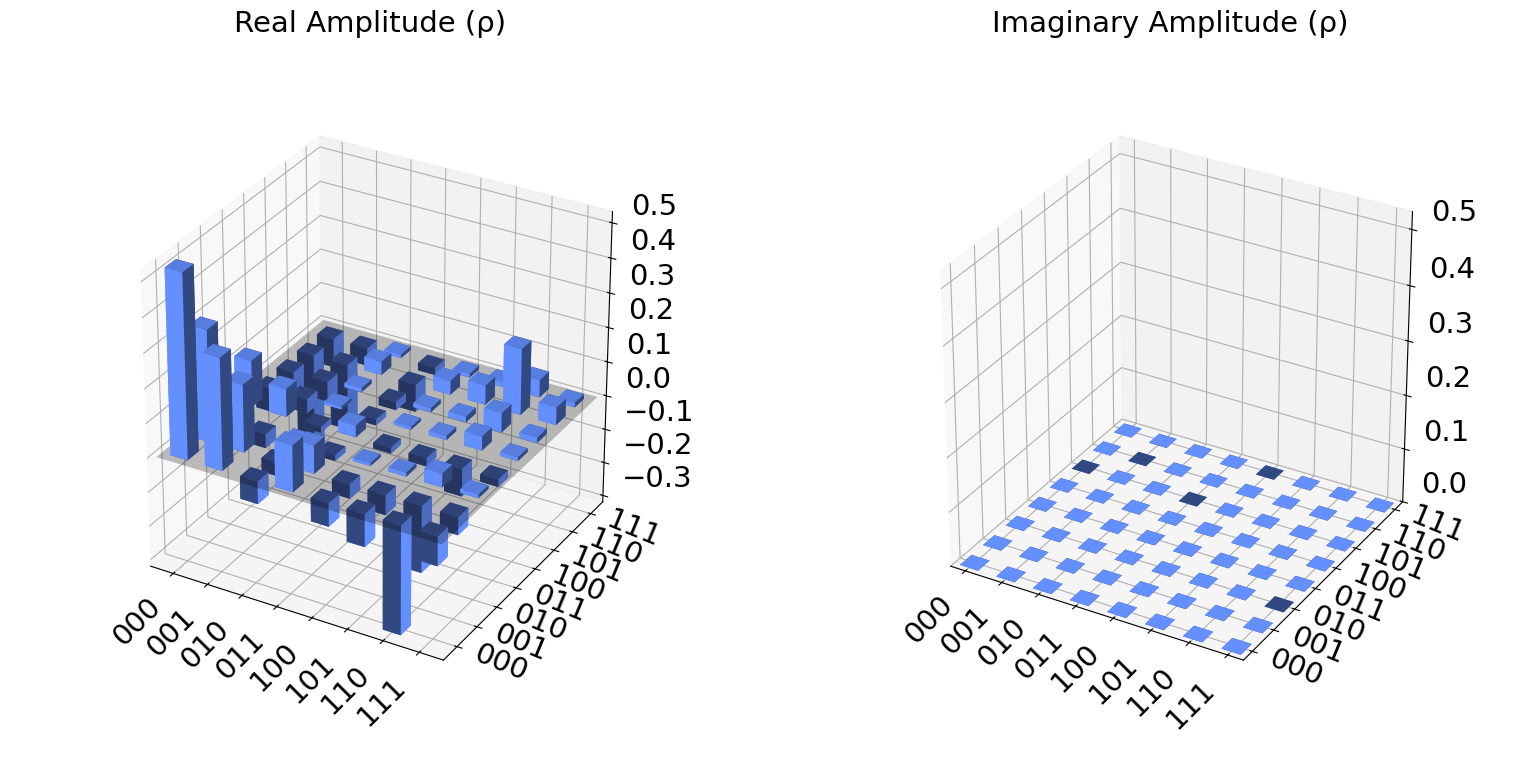

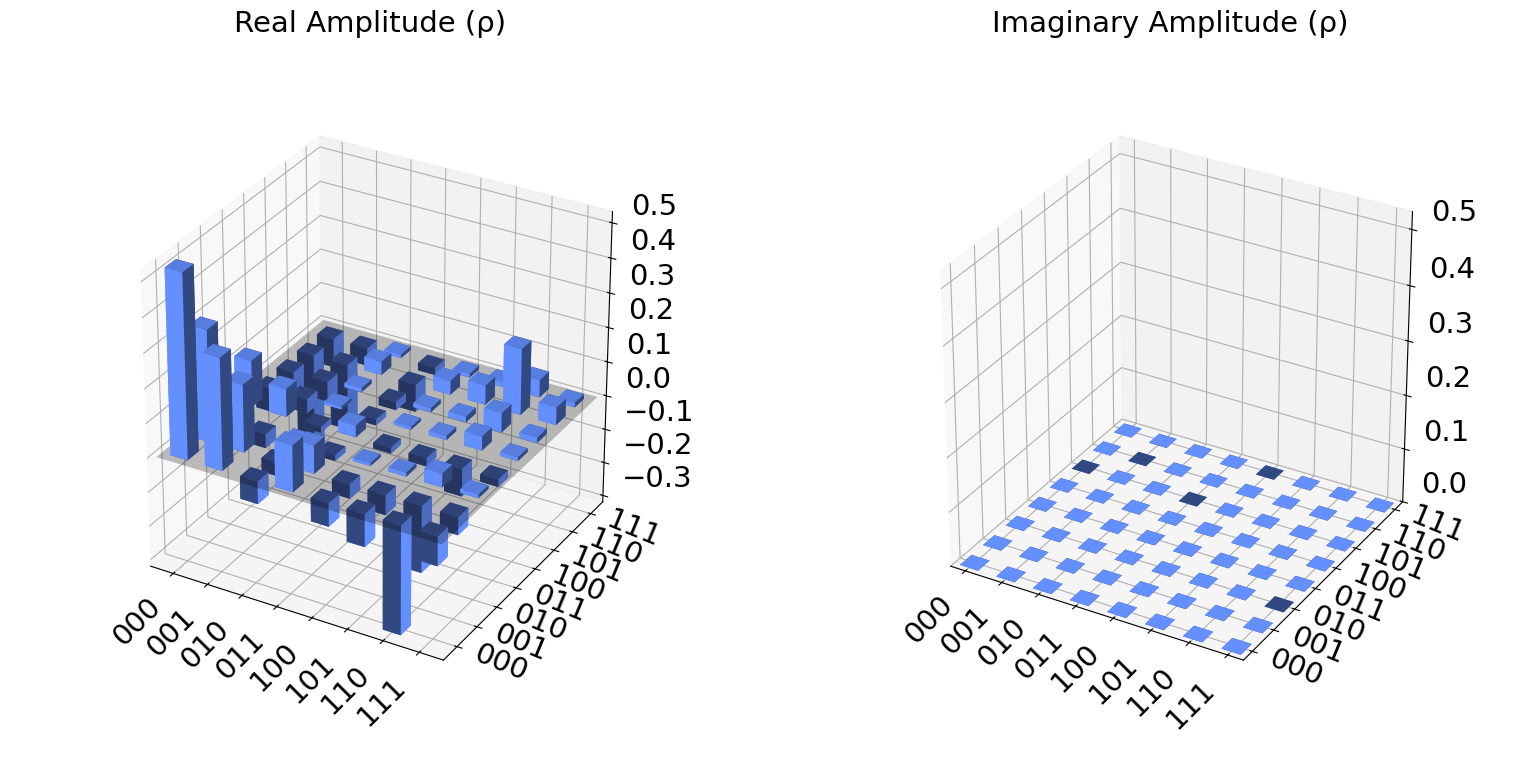

In [22]:
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit import QuantumRegister, AncillaRegister, QuantumCircuit, transpile
import numpy as np
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram, plot_state_city


psi = [1, 3, 1, 2, 7, 1, 1, 1]


number_of_mps_layers = 2
state = QuantumState.from_dense_data(data=psi, normalize=True)


qc = state.generate_mps_initializer_circuit(number_of_layers=number_of_mps_layers)


simulator = AerSimulator(method='automatic')
qc = transpile(qc, simulator)
qc.save_statevector()

result = simulator.run(qc, shots = 1000).result()
statevector = result.get_statevector()



for i, amp in enumerate(statevector):
    print(f"|{format(i, '03b')}>: {amp}")



counts = result.get_counts()
print("Counts:", counts)
plot_state_city(statevector)







    

DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.
|000>: (-0.08541028748217278+0j)
|001>: (0.9224883899461818+0j)
|010>: (-0.2763637596498507+0j)
|011>: (-0.1856034818052563+0j)
|100>: (-0.07022230149060386+0j)
|101>: (-0.07023305024597429+0j)
|110>: (-0.14377842206206887+0j)
|111>: (0.0189363533060153+0j)


/tmp/ipykernel_1323/3456336337.py:23: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, amp in enumerate(statevector):


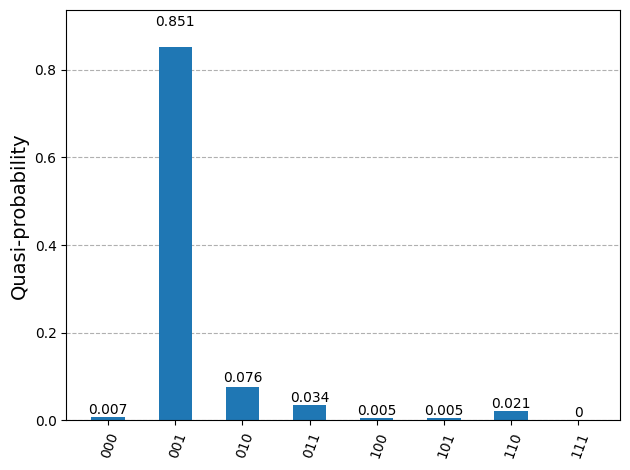

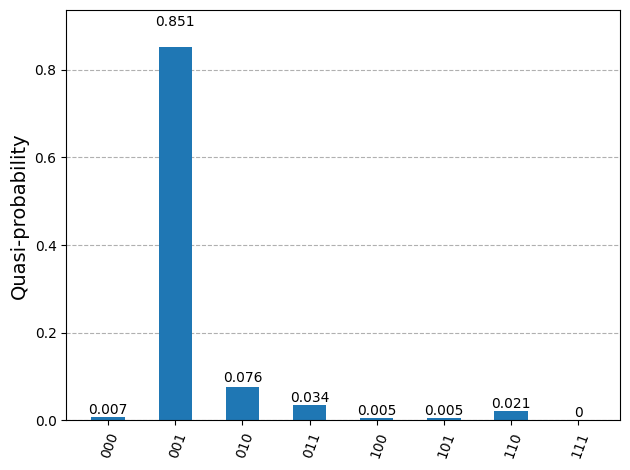

In [24]:
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


psi = [1, 3, 1, 2, 7, 8, 0, 1]
state = QuantumState.from_dense_data(data=psi, normalize=True)
number_of_mps_layers = 2
circuit = state.generate_mps_initializer_circuit(number_of_layers=number_of_mps_layers)



simulator = AerSimulator(method='automatic')
circuit.save_statevector()  # Save the full wavefunction


circuit = transpile(circuit, simulator)
result = simulator.run(circuit).result()

statevector = result.get_statevector()

for i, amp in enumerate(statevector):
    print(f"|{format(i, '03b')}>: {amp}")

counts = result.get_counts()

plot_histogram(counts)



DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.
DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.

Statevector comparison (ψ vs ϕ):
|000>: ψ=(0.156494656739311+0j), ϕ=(0.15649465673931104-2.404201914409724e-17j), Δphase=-0.000 rad
|001>: ψ=(0.5491306259156684+0j), ϕ=(0.5491306259156683+2.4042019144097234e-17j), Δphase=0.000 rad
|010>: ψ=(-0.18079733313307297+0j), ϕ=(-0.18079733313307295-2.5558493998559147e-17j), Δphase=-6.283 rad
|011>: ψ=(0.2366045498646038+0j), ϕ=(0.2366045498646038+2.555849399855914e-17j), Δphase=0.000 rad
|100>: ψ=(0.5629739434975396+0j), ϕ=(0.5629739434975396+3.2577311879519385e-17j), Δphase=0.000 rad
|101>: ψ=(0.030946065709413773+0j), ϕ=(0.030946065709413717-3.257731187951938e-17j), Δphase=-0.000 rad
|110>: ψ=(-0.5170817863661461+0j), ϕ=(-0.36563203756755563-0.3656320375675556j), Δphase=-5.498 rad
|111>: ψ=(-

/tmp/ipykernel_1323/3839693241.py:45: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, (amp_psi, amp_phi) in enumerate(zip(psi_statevector, phi_statevector)):
/tmp/ipykernel_1323/3839693241.py:50: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  psi_probs = {f"{i:03b}": np.abs(amp)**2 for i, amp in enumerate(psi_statevector)}
/tmp/ipykernel_1323/3839693241.py

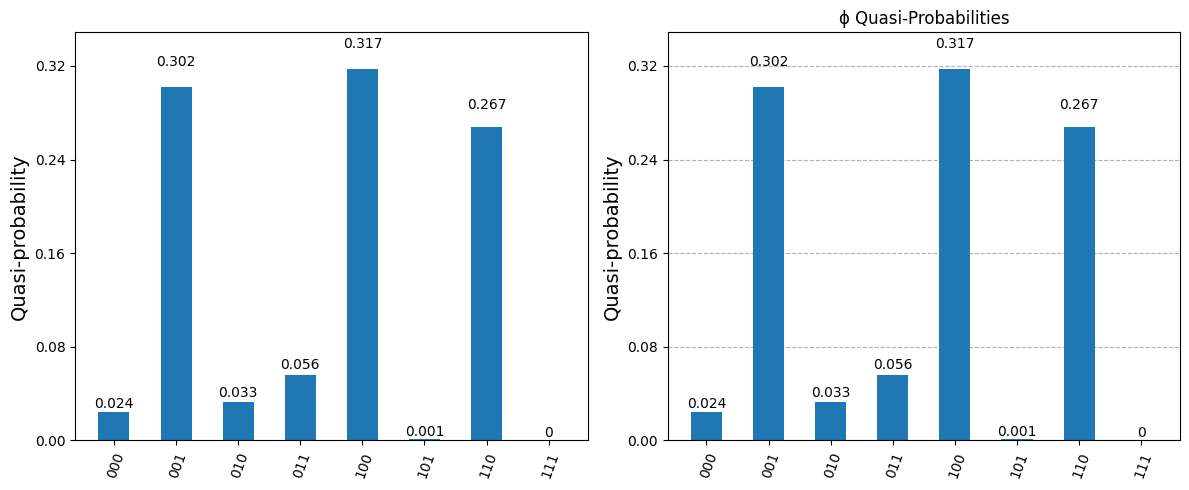

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_mps_initializer.datatypes import QuantumState
import numpy as np
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram


psi = [1, 2, 3, 4, 5, 6, 7, 8]
phi = [1, 2, 3, 4, 5, 6, 7, 8]
number_of_layers = 2

psi_state = QuantumState.from_dense_data(data=psi, normalize=True)
phi_state = QuantumState.from_dense_data(data=phi, normalize=True)


psi_circuit = psi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
phi_circuit = phi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)

#for phi we need to add a global phase
qc_phi = QuantumCircuit(3)
qc_phi.compose(phi_circuit, inplace=True)
qc_phi.x(0)
qc_phi.mcp(np.pi/4, [0, 1], 2)
qc_phi.x(0)


simulator = AerSimulator(method='automatic')

#psi
psi_sv = psi_circuit.copy()
psi_sv.save_statevector()
psi_result = simulator.run(transpile(psi_sv, simulator)).result()
psi_statevector = psi_result.get_statevector()

#for phi
phi_sv = qc_phi.copy()
phi_sv.save_statevector()
phi_result = simulator.run(transpile(phi_sv, simulator)).result()
phi_statevector = phi_result.get_statevector()

# Compare amplitudes and phase difference
print("\nStatevector comparison (ψ vs ϕ):")
for i, (amp_psi, amp_phi) in enumerate(zip(psi_statevector, phi_statevector)):
    basis = f"|{format(i, '03b')}>"
    delta_phase = np.angle(amp_phi) - np.angle(amp_psi)
    print(f"{basis}: ψ={amp_psi}, ϕ={amp_phi}, Δphase={delta_phase:.3f} rad")

    psi_probs = {f"{i:03b}": np.abs(amp)**2 for i, amp in enumerate(psi_statevector)}
phi_probs = {f"{i:03b}": np.abs(amp)**2 for i, amp in enumerate(phi_statevector)}

# Plot quasi-probabilities as histogram
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_histogram(psi_probs, ax=axs[0], title="ψ Quasi-Probabilities")
plot_histogram(phi_probs, ax=axs[1], title="ϕ Quasi-Probabilities")
plt.tight_layout()
plt.show()


DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.
DEBUG LOG: MPS initializer generator was called. This log is for the purpose of reducing the number of calls to this function.

Statevector comparison (ψ vs ϕ):
|000>: ψ=(0.156494656739311+0j), ϕ=(0.15649465673931104-2.404201914409724e-17j), Δphase=-0.000 rad
|001>: ψ=(0.5491306259156684+0j), ϕ=(0.5491306259156683+2.4042019144097234e-17j), Δphase=0.000 rad
|010>: ψ=(-0.18079733313307297+0j), ϕ=(-0.18079733313307295-2.5558493998559147e-17j), Δphase=-6.283 rad
|011>: ψ=(0.2366045498646038+0j), ϕ=(0.2366045498646038+2.555849399855914e-17j), Δphase=0.000 rad
|100>: ψ=(0.5629739434975396+0j), ϕ=(0.5629739434975396+3.2577311879519385e-17j), Δphase=0.000 rad
|101>: ψ=(0.030946065709413773+0j), ϕ=(0.030946065709413717-3.257731187951938e-17j), Δphase=-0.000 rad
|110>: ψ=(-0.5170817863661461+0j), ϕ=(-0.36563203756755563-0.3656320375675556j), Δphase=-5.498 rad
|111>: ψ=(-

/tmp/ipykernel_1323/3058811547.py:44: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for i, (amp_psi, amp_phi) in enumerate(zip(psi_statevector, phi_statevector)):


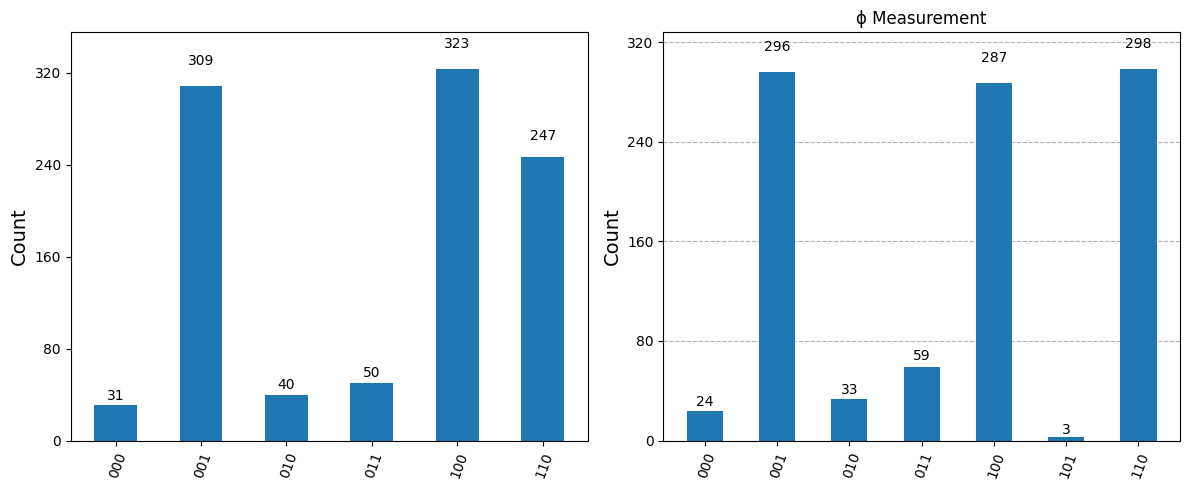

In [37]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt


psi = [1, 2, 3, 4, 5, 6, 7, 8]
phi = [1, 2, 3, 4, 5, 6, 7, 8]
number_of_layers = 2


psi_state = QuantumState.from_dense_data(data=psi, normalize=True)
phi_state = QuantumState.from_dense_data(data=phi, normalize=True)


psi_circuit = psi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
phi_circuit = phi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)

#applying phase on phi circuit
qc_phi = QuantumCircuit(3)
qc_phi.compose(phi_circuit, inplace=True)
qc_phi.x(0)
qc_phi.mcp(np.pi/4, [0, 1], 2)
qc_phi.x(0)

# Simulator
simulator = AerSimulator(method='automatic')

#statevectors

psi_sv = psi_circuit.copy()
psi_sv.save_statevector()
psi_statevector = simulator.run(transpile(psi_sv, simulator)).result().get_statevector()

phi_sv = qc_phi.copy()
phi_sv.save_statevector()
phi_statevector = simulator.run(transpile(phi_sv, simulator)).result().get_statevector()


# Print statevector comparison
print("\nStatevector comparison (ψ vs ϕ):")
for i, (amp_psi, amp_phi) in enumerate(zip(psi_statevector, phi_statevector)):
    basis = f"|{format(i, '03b')}>"
    delta_phase = np.angle(amp_phi) - np.angle(amp_psi)
    print(f"{basis}: ψ={amp_psi}, ϕ={amp_phi}, Δphase={delta_phase:.3f} rad")




#measuring
psi_measure = psi_circuit.copy()
psi_measure.measure_all()
psi_counts = simulator.run(transpile(psi_measure, simulator), shots=1000).result().get_counts()

phi_measure = qc_phi.copy()
phi_measure.measure_all()
phi_counts = simulator.run(transpile(phi_measure, simulator), shots=1000).result().get_counts()


#plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_histogram(psi_counts, ax=axs[0], title="ψ Measurement")
plot_histogram(phi_counts, ax=axs[1], title="ϕ Measurement")
plt.tight_layout()
plt.show()
